## Springboard Data Science Career Track - Capstone 2

#### John Peterson

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import scipy.stats as stats

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_log_error

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### Data Wrangling and EDA

In [3]:
print("Train Shape : ", train_df.shape)
print("Test Shape : ", test_df.shape)

Train Shape :  (4459, 4993)
Test Shape :  (49342, 4992)


In [4]:
print(train_df.head())

          ID      target  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  \
0  000d6aaf2  38000000.0        0.0          0        0.0          0   
1  000fbd867    600000.0        0.0          0        0.0          0   
2  0027d6b71  10000000.0        0.0          0        0.0          0   
3  0028cbf45   2000000.0        0.0          0        0.0          0   
4  002a68644  14400000.0        0.0          0        0.0          0   

   2f0771a37  30347e683  d08d1fbe3  6ee66e115    ...      3ecc09859  \
0          0          0          0          0    ...            0.0   
1          0          0          0          0    ...            0.0   
2          0          0          0          0    ...            0.0   
3          0          0          0          0    ...            0.0   
4          0          0          0          0    ...            0.0   

   9281abeea  8675bec0b  3a13ed79a  f677d4d13  71b203550  137efaa80  \
0        0.0        0.0          0          0          0          0  

In [5]:
train_df.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


**Initial Observations**

1. Test set is very large, roughly 10 times larger than train set
2. Train set number of columns is more than the number of rows
3. Lots of zero values in the data
4. Column names are anonymized

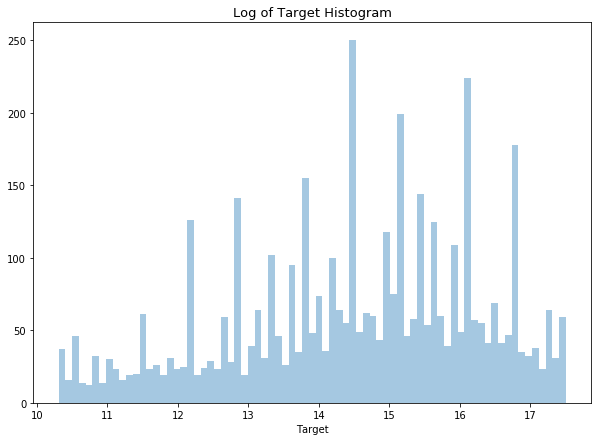

In [6]:
# plot log of target 
plt.figure(figsize=(10,7))
sns.distplot(np.log1p(train_df['target'].values), bins=75, kde=False)
plt.xlabel('Target')
plt.title('Log of Target Histogram', fontsize=13)
plt.show()

In [7]:
# missing values check
missing = train_df.isnull().sum(axis=0).reset_index()
missing.columns = ['column_name', 'missing_total']
missing = missing[missing['missing_total']>0]
missing = missing.sort_values(by='missing_total')
missing

,column_name,missing_total


##### Columns with constant values

In [8]:
unique_df = train_df.nunique().reset_index()
unique_df.head(20)

,index,0
0,ID,4459
1,target,1413
2,48df886f9,32
3,0deb4b6a8,5
4,34b15f335,29
5,a8cb14b00,3
6,2f0771a37,6
7,30347e683,25
8,d08d1fbe3,6
9,6ee66e115,6


In [9]:
unique_df.columns = ['col_name', 'unique_count']
constant_col_df = unique_df[unique_df['unique_count']==1]
constant_col_df.shape

(256, 2)

To determine the columns with only zero data the unique numbers in each column were counted. Columns with 1 unique number are zero and those will be removed. 256 columns were identifed with constant values. A check below is looking at the sum of the columns.

In [10]:
constant_col_df.head()

,col_name,unique_count
28,d5308d8bc,1
35,c330f1a67,1
38,eeac16933,1
59,7df8788e8,1
70,5b91580ee,1


In [11]:
print("Column: d5308d8bc, with unique count 1 =", train_df['d5308d8bc'].sum())
print("Column: 5b91580ee, with unique count 1 =", train_df['5b91580ee'].sum())
print("Column: d08d1fbe3, with unique count 6 =", train_df['d08d1fbe3'].sum())

Column: d5308d8bc, with unique count 1 = 0
Column: 5b91580ee, with unique count 1 = 0
Column: d08d1fbe3, with unique count 6 = 75202000


##### Correlation of features with Target

In [12]:
# drop the 256 columns with zero unique numbers
train_df_1 = train_df.drop(constant_col_df.col_name.tolist(), axis=1)
train_df_1.shape

(4459, 4737)

In [13]:
# create correlation df
train_df_corr = train_df_1.drop('ID', axis=1)
train_df_corr.head()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,38000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,600000.0,0.0,0,0.0,0,0,0,0,0,2200000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,2000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,14400000.0,0.0,0,0.0,0,0,0,0,0,2000000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [14]:
from scipy.stats import spearmanr, pearsonr
import warnings
warnings.filterwarnings("ignore")

In [15]:
# pearson correlation coefficients
labels = []
values = []
for col in train_df_corr.columns:
    if col not in ['target']:
        labels.append(col)
        values.append(pearsonr(train_df_corr[col].values, train_df_corr['target'].values)[0])
train_df_corr_pear = pd.DataFrame({'column_labels':labels, 'corr_values':values})
train_df_corr_pear = train_df_corr_pear.sort_values(by='corr_values')
train_df_corr_pear = train_df_corr_pear[(train_df_corr_pear['corr_values']>0.25) | (train_df_corr_pear['corr_values']<-0.25)]

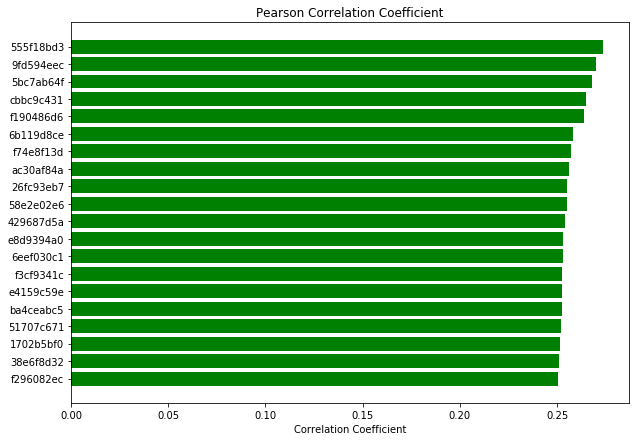

In [16]:
# plot the coefficients pearson
ind = np.arange(train_df_corr_pear.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(10,7))
rects = ax.barh(ind, np.array(train_df_corr_pear.corr_values.values), color='green')
ax.set_yticks(ind)
ax.set_yticklabels(train_df_corr_pear.column_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation Coefficient")
ax.set_title("Pearson Correlation Coefficient")
plt.show()

In [19]:
# spearman correlation coefficeints
#labels = []
#values = []
#for col in train_df_corr.columns:
#    if col not in ['target']:
 #       labels.append(col)
  #      values.append(spearmanr(train_df_corr[col].values, train_df_corr['target'].values)[0])
#train_df_corr_spear = pd.DataFrame({'column_labels':labels, 'corr_values':values})
#train_df_corr_spear = train_df_corr_spear.sort_values(by='corr_values')
#train_df_corr_spear = train_df_corr_spear[(train_df_corr_spear['corr_values']>0.1) | (train_df_corr_spear['corr_values']<-0.1)]

In [20]:
# plot the coefficients spearman
#ind = np.arange(train_df_corr_spear.shape[0])
#width = 0.9
#fig, ax = plt.subplots(figsize=(10,20))
#rects = ax.barh(ind, np.array(train_df_corr_spear.corr_values.values), color='orange')
#ax.set_yticks(ind)
#ax.set_yticklabels(train_df_corr_spear.column_labels.values, rotation='horizontal')
#ax.set_xlabel("Correlation Coefficient")
#ax.set_title("Spearman Correlation Coefficient")
#plt.show()

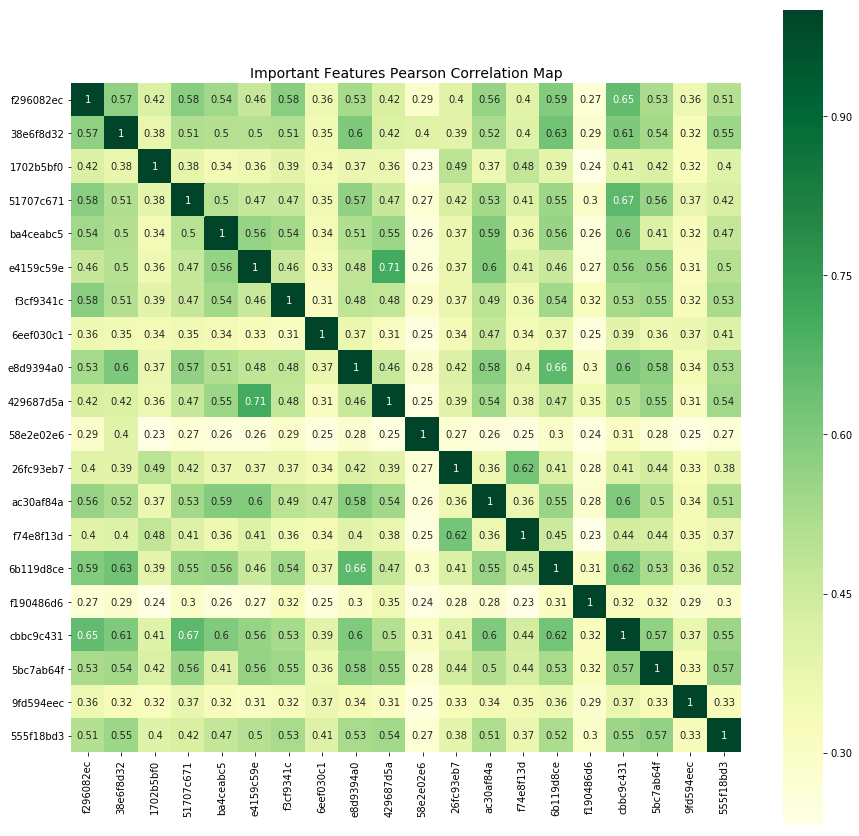

In [17]:
# plot pearson selected variables heatmap
temp_df_pear = train_df[train_df_corr_pear.column_labels.tolist()]
corrmat_pear = temp_df_pear.corr(method='pearson')
f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corrmat_pear, vmax=1., square=True, cmap="YlGn", annot=True)
plt.title('Important Features Pearson Correlation Map', fontsize=14)
plt.show()

In [22]:
# plot spearman selected variables heatmap
#temp_df_spear = train_df[train_df_corr_spear.column_labels.tolist()]
#corrmat_spear = temp_df_pear.corr(method='spearman')
#f, ax = plt.subplots(figsize=(15,15))

#sns.heatmap(corrmat_spear, vmax=1., square=True, cmap="OrRd", annot=True)
#plt.title('Important Features Spearman Correlation Map', fontsize=14)
#plt.show()

#### Baseline Model

In [18]:
# create train and test sets from training data
X_train, X_test, y_train, y_test = train_test_split(train_df_1.drop(['ID','target'], axis=1), train_df_1['target'], test_size=0.30, random_state=28)

In [19]:
# baseline gradient bootsing model
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
pred_train_y1 = gbr.predict(X_train)
pred_test_y1 = gbr.predict(X_test)

In [20]:
gbr_rmsle_train = np.sqrt(mean_squared_log_error(y_train, pred_train_y1))
gbr_rmsle_test = np.sqrt(mean_squared_log_error(y_test, pred_test_y1))
print('Root Mean Squared Log Error Train: {}'.format(gbr_rmsle_train))
print('Root Mean Squared Log Error Test: {}'.format(gbr_rmsle_test))

Root Mean Squared Log Error Train: 1.8617260252302408
Root Mean Squared Log Error Test: 1.8239498092312172


In [21]:
# baseline random forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred_train_y2 = rf.predict(X_train)
pred_test_y2 = rf.predict(X_test)

In [22]:
rf_rmsle_train = np.sqrt(mean_squared_log_error(y_train, pred_train_y2))
rf_rmsle_test = np.sqrt(mean_squared_log_error(y_test, pred_test_y2))
print('Root Mean Squared Log Error Train: {}'.format(rf_rmsle_train))
print('Root Mean Squared Log Error Test: {}'.format(rf_rmsle_test))

Root Mean Squared Log Error Train: 1.0822021919956593
Root Mean Squared Log Error Test: 1.6344428994289413


In [23]:
# baselien linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train_y3 = lr.predict(X_train)
pred_test_y3 = lr.predict(X_test)

In [24]:
pred_test_y3

array([7.01176856e+13, 5.13750940e+14, 8.08590498e+14, ...,
       2.42394610e+14, 1.33457536e+15, 1.51588741e+15])

In [42]:
lr_rmsle_train = np.sqrt(mean_squared_log_error(y_train, pred_train_y3))
lr_rmsle_test = np.sqrt(mean_squared_log_error(y_test, pred_test_y3))
print('Root Mean Squared Log Error Train: {}'.format(lr_rmsle_train))
print('Root Mean Squared Log Error Test: {}'.format(lr_rmsle_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [26]:
# find the important features gbr
feat_names = X_train.columns.values
feat_importances_gbr = gbr.feature_importances_
top_feature_importance_gbr = pd.DataFrame({'feature_names':feat_names, 'importance':feat_importances_gbr}).sort_values('importance', ascending=False)

top_feature_importance_gbr[:20]

,feature_names,importance
3470,eeb9cd3aa,0.033873
2378,58e2e02e6,0.024125
4135,f190486d6,0.020970
3715,eda856f5f,0.016213
3239,899dbe405,0.014389
1706,c1ad8b95a,0.014386
4479,6d0d72180,0.014379
4025,15ace8c9f,0.013544
11,77c9823f2,0.013336
1696,2e7f340f2,0.012279


In [27]:
# find the important features rf
feat_names = X_train.columns.values
feat_importances_rf = rf.feature_importances_
top_feature_importance_rf = pd.DataFrame({'feature_names':feat_names, 'importance':feat_importances_rf}).sort_values('importance', ascending=False)

top_feature_importance_rf[:20]

,feature_names,importance
4135,f190486d6,0.076558
2378,58e2e02e6,0.019752
3470,eeb9cd3aa,0.018425
3784,70feb1494,0.013810
3337,cbbc9c431,0.013285
2082,58e056e12,0.012681
4423,f1851d155,0.011707
113,963a49cdc,0.011606
8,20aa07010,0.010509
1466,b4da814b8,0.009681


#### Hyperparameter Tuning

In [37]:
# gradient boosting tuning
param_grid_gbr = {'learning_rate': [0.1, 0.05, 0.02, .01],
                  'max_depth': [4, 6, 8],
                  'min_samples_leaf': [10, 25, 50, 100],
                  'max_features': [1.0, 0.3, 0.1]
                 }
gbr_gs = GradientBoostingRegressor(n_estimators=600)

gbr_gridcv = GridSearchCV(gbr_gs, 
                          param_grid_gbr, 
                          cv=3, 
                          scoring='neg_mean_squared_log_error',
                          verbose=3,
                          n_jobs=10)

gbr_gridcv.fit(X_train, y_train)
gbr_gridcv.grid_scores_, gbr_gridcv.best_params_, gbr_gridcv.best_score_

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] learning_rate=0.1, max_depth=4, max_features=1.0, min_samples_leaf=10 
[CV] learning_rate=0.1, max_depth=4, max_features=1.0, min_samples_leaf=10 
[CV] learning_rate=0.1, max_depth=4, max_features=1.0, min_samples_leaf=10 
[CV] learning_rate=0.1, max_depth=4, max_features=1.0, min_samples_leaf=25 
[CV] learning_rate=0.1, max_depth=4, max_features=1.0, min_samples_leaf=25 
[CV] learning_rate=0.1, max_depth=4, max_features=1.0, min_samples_leaf=25 
[CV] learning_rate=0.1, max_depth=4, max_features=1.0, min_samples_leaf=50 
[CV] learning_rate=0.1, max_depth=4, max_features=1.0, min_samples_leaf=50 
[CV] learning_rate=0.1, max_depth=4, max_features=1.0, min_samples_leaf=50 
[CV] learning_rate=0.1, max_depth=4, max_features=1.0, min_samples_leaf=100 
[CV] learning_rate=0.1, max_depth=4, max_features=1.0, min_samples_leaf=100 
[CV] learning_rate=0.1, max_depth=4, max_features=1.0, min_samples_leaf=100 
[CV] learning_rate=0.1

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x1061226f0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/johnpeterson/anaconda3/lib/python3.6/site...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/johnp.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x1061226f0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/johnpeterson/anaconda3/lib/python3.6/site...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/johnp.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "# gradient boosting tuning\nparam_grid_gbr = {'le..., gbr_gridcv.best_params_, gbr_gridcv.best_score_", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 8, 19, 6, 29, 5, 215695, tzinfo=tzutc()), 'msg_id': '0519db3020b4461f85e571a6676163a7', 'msg_type': 'execute_request', 'session': 'ff0aeddd2c5043f08f4aa46f1b60537c', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0519db3020b4461f85e571a6676163a7', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'ff0aeddd2c5043f08f4aa46f1b60537c']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "# gradient boosting tuning\nparam_grid_gbr = {'le..., gbr_gridcv.best_params_, gbr_gridcv.best_score_", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 8, 19, 6, 29, 5, 215695, tzinfo=tzutc()), 'msg_id': '0519db3020b4461f85e571a6676163a7', 'msg_type': 'execute_request', 'session': 'ff0aeddd2c5043f08f4aa46f1b60537c', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0519db3020b4461f85e571a6676163a7', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'ff0aeddd2c5043f08f4aa46f1b60537c'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "# gradient boosting tuning\nparam_grid_gbr = {'le..., gbr_gridcv.best_params_, gbr_gridcv.best_score_", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 8, 19, 6, 29, 5, 215695, tzinfo=tzutc()), 'msg_id': '0519db3020b4461f85e571a6676163a7', 'msg_type': 'execute_request', 'session': 'ff0aeddd2c5043f08f4aa46f1b60537c', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0519db3020b4461f85e571a6676163a7', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="# gradient boosting tuning\nparam_grid_gbr = {'le..., gbr_gridcv.best_params_, gbr_gridcv.best_score_", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "# gradient boosting tuning\nparam_grid_gbr = {'le..., gbr_gridcv.best_params_, gbr_gridcv.best_score_"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("# gradient boosting tuning\nparam_grid_gbr = {'le..., gbr_gridcv.best_params_, gbr_gridcv.best_score_",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("# gradient boosting tuning\nparam_grid_gbr = {'le..., gbr_gridcv.best_params_, gbr_gridcv.best_score_",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="# gradient boosting tuning\nparam_grid_gbr = {'le..., gbr_gridcv.best_params_, gbr_gridcv.best_score_", store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-37-8e6a533c0b58>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1a2c0fac88, execution..._before_exec=None error_in_exec=None result=None>)
   2845 
   2846         try:
   2847             for i, node in enumerate(to_run_exec):
   2848                 mod = ast.Module([node])
   2849                 code = compiler(mod, cell_name, "exec")
-> 2850                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x10f434b70, file "<ipython-input-37-8e6a533c0b58>", line 16>
        result = <ExecutionResult object at 1a2c0fac88, execution..._before_exec=None error_in_exec=None result=None>
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x10f434b70, file "<ipython-input-37-8e6a533c0b58>", line 16>, result=<ExecutionResult object at 1a2c0fac88, execution..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x10f434b70, file "<ipython-input-37-8e6a533c0b58>", line 16>
        self.user_global_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GradientBoostingRegressor': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import numpy as np\nimport pandas as pd\nimport ma...rom sklearn.metrics import mean_squared_log_error', "train_df = pd.read_csv('train.csv')\ntest_df = pd.read_csv('test.csv')", 'print("Train Shape : ", train_df.shape)\nprint("Test Shape : ", test_df.shape)', 'print(train_df.head())', 'train_df.describe()', "# plot log of target \nplt.figure(figsize=(10,7))...Log of Target Histogram', fontsize=13)\nplt.show()", "# missing values check\nmissing = train_df.isnull...= missing.sort_values(by='missing_total')\nmissing", 'unique_df = train_df.nunique().reset_index()\nunique_df.head(20)', "unique_df.columns = ['col_name', 'unique_count']...ique_df['unique_count']==1]\nconstant_col_df.shape", 'constant_col_df.head()', 'print("Column: d5308d8bc, with unique count 1 ="...h unique count 6 =", train_df[\'d08d1fbe3\'].sum())', '# drop the 256 columns and \ntrain_df_1 = train_d...ol_df.col_name.tolist(), axis=1)\ntrain_df_1.shape', "# create correlation df\ntrain_df_corr = train_df_1.drop('ID', axis=1)\ntrain_df_corr.head()", 'from scipy.stats import spearmanr, pearsonr\nimport warnings\nwarnings.filterwarnings("ignore")', "# pearson correlation coefficients\nlabels = []\nv....25) | (train_df_corr_pear['corr_values']<-0.25)]", '# plot the coefficients pearson\nind = np.arange(...tle("Pearson Correlation Coefficient")\nplt.show()', "# plot pearson selected variables heatmap\ntemp_d...Pearson Correlation Map', fontsize=14)\nplt.show()", "# create train and test sets from training data\n..._df_1['target'], test_size=0.30, random_state=28)", '# gradient bootsing model\ngbr = GradientBoosting...edict(X_train)\npred_test_y1 = gbr.predict(X_test)', ...], 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {5:              target     48df886f9     0deb4b6a8 ...  
max    4.320000e+07  

[8 rows x 4992 columns], 7: Empty DataFrame
Columns: [column_name, missing_total]
Index: [], 8:         index     0
0          ID  4459
1      t...d09    28
18  96f83a237    16
19  b8a716ebf   128, 9: (256, 2), 10:      col_name  unique_count
28  d5308d8bc       ...f8788e8             1
70  5b91580ee             1, 12: (4459, 4737), 13:        target  48df886f9  0deb4b6a8  34b15f335  ...          0          0  

[5 rows x 4736 columns], 24: array([7.01176856e+13, 5.13750940e+14, 8.0859049... 2.42394610e+14, 1.33457536e+15, 1.51588741e+15]), 26:      feature_names  importance
3470     eeb9cd3a...4c1e90    0.009993
4618     f7f553aea    0.009726, 27:      feature_names  importance
4135     f190486d...e8f13d    0.005796
3872     2288333b4    0.005769, ...}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, ...}
        self.user_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GradientBoostingRegressor': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import numpy as np\nimport pandas as pd\nimport ma...rom sklearn.metrics import mean_squared_log_error', "train_df = pd.read_csv('train.csv')\ntest_df = pd.read_csv('test.csv')", 'print("Train Shape : ", train_df.shape)\nprint("Test Shape : ", test_df.shape)', 'print(train_df.head())', 'train_df.describe()', "# plot log of target \nplt.figure(figsize=(10,7))...Log of Target Histogram', fontsize=13)\nplt.show()", "# missing values check\nmissing = train_df.isnull...= missing.sort_values(by='missing_total')\nmissing", 'unique_df = train_df.nunique().reset_index()\nunique_df.head(20)', "unique_df.columns = ['col_name', 'unique_count']...ique_df['unique_count']==1]\nconstant_col_df.shape", 'constant_col_df.head()', 'print("Column: d5308d8bc, with unique count 1 ="...h unique count 6 =", train_df[\'d08d1fbe3\'].sum())', '# drop the 256 columns and \ntrain_df_1 = train_d...ol_df.col_name.tolist(), axis=1)\ntrain_df_1.shape', "# create correlation df\ntrain_df_corr = train_df_1.drop('ID', axis=1)\ntrain_df_corr.head()", 'from scipy.stats import spearmanr, pearsonr\nimport warnings\nwarnings.filterwarnings("ignore")', "# pearson correlation coefficients\nlabels = []\nv....25) | (train_df_corr_pear['corr_values']<-0.25)]", '# plot the coefficients pearson\nind = np.arange(...tle("Pearson Correlation Coefficient")\nplt.show()', "# plot pearson selected variables heatmap\ntemp_d...Pearson Correlation Map', fontsize=14)\nplt.show()", "# create train and test sets from training data\n..._df_1['target'], test_size=0.30, random_state=28)", '# gradient bootsing model\ngbr = GradientBoosting...edict(X_train)\npred_test_y1 = gbr.predict(X_test)', ...], 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {5:              target     48df886f9     0deb4b6a8 ...  
max    4.320000e+07  

[8 rows x 4992 columns], 7: Empty DataFrame
Columns: [column_name, missing_total]
Index: [], 8:         index     0
0          ID  4459
1      t...d09    28
18  96f83a237    16
19  b8a716ebf   128, 9: (256, 2), 10:      col_name  unique_count
28  d5308d8bc       ...f8788e8             1
70  5b91580ee             1, 12: (4459, 4737), 13:        target  48df886f9  0deb4b6a8  34b15f335  ...          0          0  

[5 rows x 4736 columns], 24: array([7.01176856e+13, 5.13750940e+14, 8.0859049... 2.42394610e+14, 1.33457536e+15, 1.51588741e+15]), 26:      feature_names  importance
3470     eeb9cd3a...4c1e90    0.009993
4618     f7f553aea    0.009726, 27:      feature_names  importance
4135     f190486d...e8f13d    0.005796
3872     2288333b4    0.005769, ...}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
/Users/johnpeterson/AnacondaProjects/Capstone_Project_2/<ipython-input-37-8e6a533c0b58> in <module>()
     11                           cv=3, 
     12                           scoring='neg_mean_squared_log_error',
     13                           verbose=3,
     14                           n_jobs=10)
     15 
---> 16 gbr_gridcv.fit(X_train, y_train)
     17 gbr_gridcv.grid_scores_, gbr_gridcv.best_params_, gbr_gridcv.best_score_

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=3, error_score='raise',
       e... scoring='neg_mean_squared_log_error', verbose=3), X=      48df886f9  0deb4b6a8  34b15f335  a8cb14b00...       0          0  

[3121 rows x 4735 columns], y=1721     3193600.00
4155     7940000.00
4392    ...000.00
Name: target, Length: 3121, dtype: float64, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=3, random_state=None, shuffle=False)>
        X =       48df886f9  0deb4b6a8  34b15f335  a8cb14b00...       0          0  

[3121 rows x 4735 columns]
        y = 1721     3193600.00
4155     7940000.00
4392    ...000.00
Name: target, Length: 3121, dtype: float64
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=10), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=10)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sat Aug 18 23:33:50 2018
PID: 3144            Python 3.6.4: /Users/johnpeterson/anaconda3/bin/python
...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False),       48df886f9  0deb4b6a8  34b15f335  a8cb14b00...       0          0  

[3121 rows x 4735 columns], 1721     3193600.00
4155     7940000.00
4392    ...000.00
Name: target, Length: 3121, dtype: float64, {'score': make_scorer(mean_squared_log_error, greater_is_better=False)}, array([1041, 1042, 1043, ..., 3118, 3119, 3120]), array([   0,    1,    2, ..., 1038, 1039, 1040]), 3, {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 10}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False),       48df886f9  0deb4b6a8  34b15f335  a8cb14b00...       0          0  

[3121 rows x 4735 columns], 1721     3193600.00
4155     7940000.00
4392    ...000.00
Name: target, Length: 3121, dtype: float64, {'score': make_scorer(mean_squared_log_error, greater_is_better=False)}, array([1041, 1042, 1043, ..., 3118, 3119, 3120]), array([   0,    1,    2, ..., 1038, 1039, 1040]), 3, {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 10})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False), X=      48df886f9  0deb4b6a8  34b15f335  a8cb14b00...       0          0  

[3121 rows x 4735 columns], y=1721     3193600.00
4155     7940000.00
4392    ...000.00
Name: target, Length: 3121, dtype: float64, scorer={'score': make_scorer(mean_squared_log_error, greater_is_better=False)}, train=array([1041, 1042, 1043, ..., 3118, 3119, 3120]), test=array([   0,    1,    2, ..., 1038, 1039, 1040]), verbose=3, parameters={'learning_rate': 0.1, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 10}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    483                              " make sure that it has been spelled correctly.)")
    484 
    485     else:
    486         fit_time = time.time() - start_time
    487         # _score will return dict if is_multimetric is True
--> 488         test_scores = _score(estimator, X_test, y_test, scorer, is_multimetric)
        test_scores = {}
        estimator = GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False)
        X_test =       48df886f9  0deb4b6a8  34b15f335  a8cb14b00...       0          0  

[1041 rows x 4735 columns]
        y_test = 1721     3193600.00
4155     7940000.00
4392    ...000.00
Name: target, Length: 1041, dtype: float64
        scorer = {'score': make_scorer(mean_squared_log_error, greater_is_better=False)}
        is_multimetric = True
    489         score_time = time.time() - start_time - fit_time
    490         if return_train_score:
    491             train_scores = _score(estimator, X_train, y_train, scorer,
    492                                   is_multimetric)

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _score(estimator=GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False), X_test=      48df886f9  0deb4b6a8  34b15f335  a8cb14b00...       0          0  

[1041 rows x 4735 columns], y_test=1721     3193600.00
4155     7940000.00
4392    ...000.00
Name: target, Length: 1041, dtype: float64, scorer={'score': make_scorer(mean_squared_log_error, greater_is_better=False)}, is_multimetric=True)
    518 
    519     Will return a single float if is_multimetric is False and a dict of floats,
    520     if is_multimetric is True
    521     """
    522     if is_multimetric:
--> 523         return _multimetric_score(estimator, X_test, y_test, scorer)
        estimator = GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False)
        X_test =       48df886f9  0deb4b6a8  34b15f335  a8cb14b00...       0          0  

[1041 rows x 4735 columns]
        y_test = 1721     3193600.00
4155     7940000.00
4392    ...000.00
Name: target, Length: 1041, dtype: float64
        scorer = {'score': make_scorer(mean_squared_log_error, greater_is_better=False)}
    524     else:
    525         if y_test is None:
    526             score = scorer(estimator, X_test)
    527         else:

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _multimetric_score(estimator=GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False), X_test=      48df886f9  0deb4b6a8  34b15f335  a8cb14b00...       0          0  

[1041 rows x 4735 columns], y_test=1721     3193600.00
4155     7940000.00
4392    ...000.00
Name: target, Length: 1041, dtype: float64, scorers={'score': make_scorer(mean_squared_log_error, greater_is_better=False)})
    548 
    549     for name, scorer in scorers.items():
    550         if y_test is None:
    551             score = scorer(estimator, X_test)
    552         else:
--> 553             score = scorer(estimator, X_test, y_test)
        score = undefined
        scorer = make_scorer(mean_squared_log_error, greater_is_better=False)
        estimator = GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False)
        X_test =       48df886f9  0deb4b6a8  34b15f335  a8cb14b00...       0          0  

[1041 rows x 4735 columns]
        y_test = 1721     3193600.00
4155     7940000.00
4392    ...000.00
Name: target, Length: 1041, dtype: float64
    554 
    555         if hasattr(score, 'item'):
    556             try:
    557                 # e.g. unwrap memmapped scalars

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py in __call__(self=make_scorer(mean_squared_log_error, greater_is_better=False), estimator=GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False), X=      48df886f9  0deb4b6a8  34b15f335  a8cb14b00...       0          0  

[1041 rows x 4735 columns], y_true=1721     3193600.00
4155     7940000.00
4392    ...000.00
Name: target, Length: 1041, dtype: float64, sample_weight=None)
    103             return self._sign * self._score_func(y_true, y_pred,
    104                                                  sample_weight=sample_weight,
    105                                                  **self._kwargs)
    106         else:
    107             return self._sign * self._score_func(y_true, y_pred,
--> 108                                                  **self._kwargs)
        self._kwargs = {}
    109 
    110 
    111 class _ProbaScorer(_BaseScorer):
    112     def __call__(self, clf, X, y, sample_weight=None):

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py in mean_squared_log_error(y_true=array([[3193600.],
       [7940000.],
       [18... 400000.],
       [9800000.],
       [ 200000.]]), y_pred=array([[2111804.94760632],
       [6774370.00153...  [5389621.78123728],
       [3683172.70855482]]), sample_weight=None, multioutput='uniform_average')
    310     if not (y_true >= 0).all() and not (y_pred >= 0).all():
    311         raise ValueError("Mean Squared Logarithmic Error cannot be used when "
    312                          "targets contain negative values.")
    313 
    314     return mean_squared_error(np.log(y_true + 1), np.log(y_pred + 1),
--> 315                               sample_weight, multioutput)
        sample_weight = None
        multioutput = 'uniform_average'
    316 
    317 
    318 def median_absolute_error(y_true, y_pred):
    319     """Median absolute error regression loss

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py in mean_squared_error(y_true=array([[14.97665968],
       [15.88742396],
    ...33],
       [16.09789305],
       [12.20607765]]), y_pred=array([[14.56305404],
       [15.72865708],
    ...73],
       [15.49998596],
       [15.11928536]]), sample_weight=None, multioutput='uniform_average')
    233     ... # doctest: +ELLIPSIS
    234     0.824...
    235 
    236     """
    237     y_type, y_true, y_pred, multioutput = _check_reg_targets(
--> 238         y_true, y_pred, multioutput)
        y_true = array([[14.97665968],
       [15.88742396],
    ...33],
       [16.09789305],
       [12.20607765]])
        y_pred = array([[14.56305404],
       [15.72865708],
    ...73],
       [15.49998596],
       [15.11928536]])
        multioutput = 'uniform_average'
    239     output_errors = np.average((y_true - y_pred) ** 2, axis=0,
    240                                weights=sample_weight)
    241     if isinstance(multioutput, string_types):
    242         if multioutput == 'raw_values':

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py in _check_reg_targets(y_true=array([[14.97665968],
       [15.88742396],
    ...33],
       [16.09789305],
       [12.20607765]]), y_pred=array([[14.56305404],
       [15.72865708],
    ...73],
       [15.49998596],
       [15.11928536]]), multioutput='uniform_average')
     72         correct keyword.
     73 
     74     """
     75     check_consistent_length(y_true, y_pred)
     76     y_true = check_array(y_true, ensure_2d=False)
---> 77     y_pred = check_array(y_pred, ensure_2d=False)
        y_pred = array([[14.56305404],
       [15.72865708],
    ...73],
       [15.49998596],
       [15.11928536]])
     78 
     79     if y_true.ndim == 1:
     80         y_true = y_true.reshape((-1, 1))
     81 

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py in check_array(array=array([[14.56305404],
       [15.72865708],
    ...73],
       [15.49998596],
       [15.11928536]]), accept_sparse=False, dtype=None, order=None, copy=False, force_all_finite=True, ensure_2d=False, allow_nd=False, ensure_min_samples=1, ensure_min_features=1, warn_on_dtype=False, estimator=None)
    448             array = array.astype(np.float64)
    449         if not allow_nd and array.ndim >= 3:
    450             raise ValueError("Found array with dim %d. %s expected <= 2."
    451                              % (array.ndim, estimator_name))
    452         if force_all_finite:
--> 453             _assert_all_finite(array)
        array = array([[14.56305404],
       [15.72865708],
    ...73],
       [15.49998596],
       [15.11928536]])
    454 
    455     shape_repr = _shape_repr(array.shape)
    456     if ensure_min_samples > 0:
    457         n_samples = _num_samples(array)

...........................................................................
/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py in _assert_all_finite(X=array([[14.56305404],
       [15.72865708],
    ...73],
       [15.49998596],
       [15.11928536]]))
     39     # everything is finite; fall back to O(n) space np.isfinite to prevent
     40     # false positives from overflow in sum method.
     41     if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
     42             and not np.isfinite(X).all()):
     43         raise ValueError("Input contains NaN, infinity"
---> 44                          " or a value too large for %r." % X.dtype)
        X.dtype = dtype('float64')
     45 
     46 
     47 def assert_all_finite(X):
     48     """Throw a ValueError if X contains NaN or infinity.

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
___________________________________________________________________________

In [49]:
# random forest tuning
param_grid_rf = {'bootstrap': [True],
                 'max_depth': [80, 90, 100, 110],
                 'max_features': [2, 3],
                 'min_samples_leaf': [3, 4, 5],
                 'n_estimators': [100, 200, 300, 1000]
                }

rf_gs = RandomForestRegressor()

rf_gridcv = GridSearchCV(rf_gs,
                         param_grid_rf,
                         cv=3,
                         scoring='neg_mean_squared_log_error',
                         n_jobs= 10,
                         verbose=2)

rf_gridcv.fit(X_train, y_train)
rf_gridcv.grid_scores_, rf_gridcv.best_params_, rf_gridcv.best_score_

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, n_estimators=100, total=   0.4s
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, n_estimators=200 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, n_estimators=300 
[CV

[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    7.2s


[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, n_estimators=200 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, n_estimators=200, total=   0.6s
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=80,

[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, n_estimators=300 
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=1000, total=   3.9s
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=1000, total=   3.6s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, n_estimators=300, total=   1.2s
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, n_estimators=1000, total=   3.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, n_estimators=300, total=   1.3s
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, n_estimators=300, total=   1.1s
[CV] bootstrap

[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, n_estimators=200 
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, n_estimators=200, total=   0.9s
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=90

[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:   45.9s


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=200 
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=200, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=200, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, n_estimators=1000, total=   2.8s
[CV]  bootstrap=True, max

[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, n_estimators=200, total=   0.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, n_estimators=1000 
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, n_estimators=300, total=   0.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, n_estimators=300, total=   0.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, n_estimators=300, total=   1.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, 

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, n_estimators=200, total=   0.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, n_estimators=200 
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, n_estimators=200, total=   0.7s
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, n_estimators=300 
[CV]  bootstrap=True, ma

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, n_estimators=1000, total=   3.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, n_estimators=300, total=   1.3s
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, n_estimators=1000, total=   3.4s
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, n_estimators=300, total=   1.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, n_estimators=1000, total=   3.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, n_estimators=300, total=   1.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, n_estimators=100 
[CV] 

[Parallel(n_jobs=10)]: Done 288 out of 288 | elapsed:  1.5min finished


([mean: -4.15887, std: 0.20177, params: {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 100},
  mean: -4.16119, std: 0.20453, params: {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 200},
  mean: -4.15828, std: 0.20337, params: {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 300},
  mean: -4.16037, std: 0.20049, params: {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 1000},
  mean: -4.19265, std: 0.21330, params: {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 100},
  mean: -4.18173, std: 0.21009, params: {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 200},
  mean: -4.18894, std: 0.21237, params: {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 300},
  mean: -4.1

#### Model Performance with Tuning

In [50]:
# random forest with tuning
rf_tune = RandomForestRegressor(bootstrap=True, max_depth= 80, max_features=3, min_samples_leaf=3, n_estimators=200)
rf_tune.fit(X_train, y_train)
pred_train_rf = rf_tune.predict(X_train)
pred_test_rf = rf_tune.predict(X_test)

In [51]:
rf_tune_rmsle_train = np.sqrt(mean_squared_log_error(y_train, pred_train_rf))
rf_tune_rmsle_test = np.sqrt(mean_squared_log_error(y_test, pred_test_rf))
print('Root Mean Squared Log Error Train: {}'.format(rf_tune_rmsle_train))
print('Root Mean Squared Log Error Test: {}'.format(rf_tune_rmsle_test))

Root Mean Squared Log Error Train: 1.9526500426372544
Root Mean Squared Log Error Test: 1.8877615762821107


#### Submission File Creation

In [140]:
# prepare test_df
test_df_1 = test_df.drop(constant_col_df.col_name.tolist() + ['ID'], axis=1)

In [141]:
len(test_df_1)

49342

In [142]:
# create prediction on test_df for initial submission
sub1_pred = rf.predict(test_df_1)

In [148]:
sub2_pred = gbr.predict(test_df_1)

In [144]:
# Initial Submission File for baseline rf
sub1_df = pd.DataFrame({"ID":test_df["ID"].values})
sub1_df['target'] = sub1_pred
sub1_df.to_csv("rf_baseline.csv", index=False)

In [150]:
# Initial Submission File for baseline gbr
sub2_df = pd.DataFrame({"ID":test_df["ID"].values})
sub2_df['target'] = sub1_pred
sub2_df.to_csv("gb_baseline.csv", index=False)